In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
sys.path.append('../')

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ImageFilter

import motivatemebot as mmb

In [2]:
img = Image.open('../images/chris.jpg')
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype("Arial.ttf", 200)

text = "Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text "
text_width, text_height = font.getsize(text)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.multiline_text((img.width / 2 - text_width / 2, img.height / 4 - text_height / 2),
                    text,(255,255,255),
                    font=font,
                    spacing=0, 
                    align="left")
img.show()

print(img.width, img.height)
print(text_width, text_height)

3430 2560
9421 222


In [16]:
mmb.image_utils.ImageText.save

<function image_utils.ImageText.save>

In [3]:
color = (255, 255, 255)
text = 'Python is a cool programming language. You should learn it!'
font = 'Arial.ttf'
img = mmb.image_utils.ImageText('../images/chris.jpg') 

#write_text_box will split the text in many lines, based on box_width
#`place` can be 'left' (default), 'right', 'center' or 'justify'
#write_text_box will return (box_width, box_calculed_height) so you can
#know the size of the wrote text
img_width, img_height = img.size

box_width = 2000
img.write_text_box((img_width / 2 - box_width / 2, img_height / 2 - 0), 
                   text, 
                   box_width=box_width, 
                   font_filename=font,
                   font_size=200, 
                   color=color, 
                   place='center')

#You don't need to specify text size: can specify max_width or max_height
# and tell write_text to fill the text in this space, so it'll compute font
# size automatically
#write_text will return (width, height) of the wrote text
# img.write_text((100, 350), 'test fill', font_filename=font,
#                font_size='fill', max_height=150, color=color)

img.show()


In [120]:
box_x = 200
box_y = 200
box_width = 1000
box_height = 1000

color = (255, 255, 255)
# text = 'Python is a cool programming language. You should learn it!'
text = "Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text"
font_file = 'Arial.ttf'

In [128]:
img = Image.open('../images/chris.jpg')
draw = ImageDraw.Draw(img)

font_size = 0
spacing = 1

text_block_height = 0
max_char_height = 0

while True:
    # Increase font size and check if it fits
    proposed_font_size = font_size + 1
    proposed_max_char_height = 0
    fits_horizontally = True
    fits_vertically = True

    font = ImageFont.truetype(font_file, proposed_font_size)

    words = text.split()
    all_lines_temp = []
    current_line = []
    for word in words:
        proposed_line = current_line + [word]
        proposed_text_width, proposed_text_height = font.getsize(' '.join(proposed_line))                # Check line width fits within box width
        if proposed_text_height > proposed_max_char_height:
            proposed_max_char_height = proposed_text_height

        if proposed_text_width <= box_width:
            current_line = proposed_line
        else:
            word_width, word_height = font.getsize(word)
            if word_width > box_width:
                fits_horizontally = False
                break
            else:
                all_lines_temp.append(' '.join(current_line))
                current_line = [word]
    # Add last valid line
    all_lines_temp.append(' '.join(current_line))

    # Check text fits within box height
#             proposed_max_char_height = 0
#             for i, line in enumerate(all_lines_temp):
#                 line_width, line_height = font.getsize(line)
#                 if line_height > proposed_max_char_height:
#                     proposed_max_char_height = line_height
    proposed_text_block_height = proposed_max_char_height * ((len(all_lines_temp) - 1) * spacing * 1.2 + 1)
    if proposed_text_block_height > box_height:
        fits_vertically = False

    if fits_horizontally and fits_vertically:
        font_size = proposed_font_size
        all_lines = all_lines_temp
        max_char_height = proposed_max_char_height
        text_block_height = proposed_text_block_height
    else:
        break

# We know the text fits with spacing = 1
proposed_spacing = spacing
while True:
    proposed_spacing = spacing + 0.01
    if proposed_spacing > 2:
        break
    proposed_text_block_height = max_char_height * ((len(all_lines) - 1) * proposed_spacing * 1.2 + 1)
    if proposed_text_block_height <= box_height:
        spacing = proposed_spacing
        text_block_height = proposed_text_block_height
    else:
        break
            
        
print('----')  
print(font_size)
print(proposed_text_width)
print(max_char_height)
print(text_block_height)
print(spacing)
print(all_lines)

----
107
606
118
995.9200000000002
1.2400000000000002
['Sample Text Sample', 'Text Sample Text', 'Sample Text Sample', 'Text Sample Text', 'Sample Text Sample', 'Text']


In [129]:
img = Image.open('../images/chris.jpg')
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype(font_file, font_size)

# text = "Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text "
for i, line in enumerate(all_lines):
    line_width, line_height = font.getsize(line)
    draw.text((box_x + box_width / 2 - line_width / 2, 
               box_y + box_height / 2 - text_block_height / 2 + i * spacing * 1.2 * max_char_height), 
              line,
              (255, 255, 255),
              font=font)
    
draw.line((box_x, box_y, box_x, box_y + box_height), width=10)    
draw.line((box_x, box_y, box_x + box_width, box_y), width=10) 
draw.line((box_x + box_width, box_y + box_height, box_x, box_y + box_height), width=10) 
draw.line((box_x + box_width, box_y + box_height, box_x + box_width, box_y), width=10) 
    
    
    
img.show()

print(img.width, img.height)

3430 2560


In [177]:
img = Image.open('../images/chris.jpg')

img_width, img_height = img.size

boundary = img_height / 15
box_x = boundary
box_y = boundary
box_width = img_width - 2 * box_x
box_height = img_height / 2 - 2 * box_y

color = (255, 255, 255)
# text = 'Python is a cool programming language. You should learn it!'
text = 'Call me old fashioned, but I believe life was better when we all agreed to eat our Taco Bell alone, in our car, in the empty corner of the grocery store parking lot, not making eye contact with anyone because we are Garbage People and that is our code.'
# text = "Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text"
# font_file = 'Arial.ttf'
# font_file = 'Zapfino.ttf'
font_file = 'Apple Chancery.ttf'
# font_file = 'Comic Sans MS.ttf'
# font_file = 'AppleGothic.ttf'

equal_spacing = True
maximize = not equal_spacing

#####

font_size = 0
spacing = 1

text_block_height = 0
max_char_height = 0

while True:
    # Increase font size and check if it fits
    proposed_font_size = font_size + 1
    proposed_max_char_height = 0
    fits_horizontally = True
    fits_vertically = True

    font = ImageFont.truetype(font_file, proposed_font_size)

    words = text.split()
    all_lines_temp = []
    current_line = []
    for word in words:
        proposed_line = current_line + [word]
        proposed_text_width, proposed_text_height = font.getsize(' '.join(proposed_line))                # Check line width fits within box width
        if proposed_text_height > proposed_max_char_height:
            proposed_max_char_height = proposed_text_height

        if proposed_text_width <= box_width:
            current_line = proposed_line
        else:
            word_width, word_height = font.getsize(word)
            if word_width > box_width:
                fits_horizontally = False
                break
            else:
                all_lines_temp.append(' '.join(current_line))
                current_line = [word]
    # Add last valid line
    all_lines_temp.append(' '.join(current_line))

    # Check text fits within box height
#             proposed_max_char_height = 0
#             for i, line in enumerate(all_lines_temp):
#                 line_width, line_height = font.getsize(line)
#                 if line_height > proposed_max_char_height:
#                     proposed_max_char_height = line_height
    if equal_spacing:
        proposed_text_block_height = proposed_max_char_height * (len(all_lines_temp) + 1) * spacing * 1.2
    else:    
        proposed_text_block_height = proposed_max_char_height * ((len(all_lines_temp) - 1) * spacing * 1.2 + 1)
    if proposed_text_block_height > box_height:
        fits_vertically = False

    if fits_horizontally and fits_vertically:
        font_size = proposed_font_size
        all_lines = all_lines_temp
        max_char_height = proposed_max_char_height
        text_block_height = proposed_text_block_height
    else:
        break

# We know the text fits with spacing = 1
# Maximized separation from top to bottom, with a limit of double spacing

proposed_spacing = spacing
while True:
    proposed_spacing = spacing + 0.01
    if proposed_spacing > 2:
        break
    if equal_spacing:
        proposed_text_block_height = max_char_height * (len(all_lines) + 1) * proposed_spacing * 1.2        
    else:
        proposed_text_block_height = max_char_height * ((len(all_lines) - 1) * proposed_spacing * 1.2 + 1)
    
    if proposed_text_block_height <= box_height:
        spacing = proposed_spacing
        text_block_height = proposed_text_block_height
    else:
        break
            
        
# print('----')  
# print(font_size)
# print(proposed_text_width)
# print(max_char_height)
# print(text_block_height)
# print(spacing)
# print(all_lines)

draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype(font_file, font_size)

# text = "Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text Sample Text "
for i, line in enumerate(all_lines):
    line_width, line_height = font.getsize(line)
    x_coord = box_x + box_width / 2 - line_width / 2
    if equal_spacing:
        y_coord = box_y + box_height / 2 - text_block_height / 2 + max_char_height * ((i + 1) * spacing * 1.2 - 0.5)
    else:
        y_coord = box_y + box_height / 2 - text_block_height / 2 + max_char_height * i * spacing * 1.2
    draw.text((x_coord, y_coord),
               line,
               (255, 255, 255),
               font=font)
    
line_width = int(boundary / 15)
if line_width % 2 == 0:
    line_width += 1
draw.line((box_x, box_y - line_width / 2 + 1, box_x, box_y + box_height + line_width / 2 - 1), width=10)    
draw.line((box_x, box_y, box_x + box_width, box_y), width=10) 
draw.line((box_x + box_width, box_y + box_height, box_x, box_y + box_height), width=10) 
draw.line((box_x + box_width, box_y + box_height + line_width / 2 - 1, box_x + box_width, box_y - line_width / 2 + 1), width=10) 
    
    
sig_size = int(boundary / 2)
cred_size = int(boundary / 4)
# MotivateMeBot sig
sig = '@MotivateMeBot'
sig_font_file = 'AppleGothic.ttf'
sig_font = ImageFont.truetype(sig_font_file, sig_size)
sig_width, sig_height = sig_font.getsize(sig)
draw.text((img_width - sig_width - sig_size, img_height - sig_height - sig_size),
            sig,
               (255, 255, 255),
               font=sig_font)


# Image Credit
image_cred = 'Image Credit: %s' % '@ChrissapherMorris'
image_cred_font_file = 'AppleGothic.ttf'
image_cred_font = ImageFont.truetype(image_cred_font_file, cred_size)
image_cred_width, image_cred_height = image_cred_font.getsize(sig)
draw.text((sig_size, img_height - image_cred_height - sig_size),
            image_cred,
               (255, 255, 255),
               font=image_cred_font)

# Quote Credit
quote_cred = 'Quote Credit: %s' % ('@Harlack')
quote_cred_font_file = 'AppleGothic.ttf'
quote_cred_font = ImageFont.truetype(quote_cred_font_file, cred_size)
quote_cred_width, quote_cred_height = quote_cred_font.getsize(sig)
draw.text((sig_size, img_height - image_cred_height * 1.2 - quote_cred_height - sig_size),
            quote_cred,
               (255, 255, 255),
               font=quote_cred_font)


img.show()

print(img.width, img.height)

3430 2560


In [166]:
boundary / 15

11.377777777777776

4029300


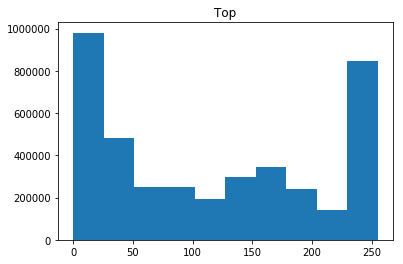

1087747 1606102
1.476540041020568
choose white
4029300


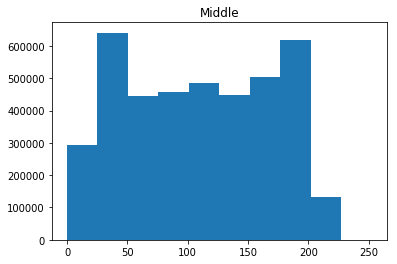

333692 1206691
3.6161819881807173
choose white


In [8]:
# img = mmb.get_image('../images/flowers.jpg')
img = mmb.get_image('../images/elizabeth_lab.jpg')
# img = mmb.get_image('../images/chris.jpg')
# img = mmb.get_image('../images/lanterns.jpg')
# img_cv = cv2.imread('../images/lanterns.jpg')

img_width, img_height = img.size

boundary = int(img_height / 15)
box_x = boundary
box_y = boundary
# box_y = int(img_height / 4)
box_width = int(img_width - 2 * box_x)
box_height = int(img_height / 2 - 2 * box_y)
background_box = (box_x, box_y, box_x + box_width, box_y + box_height)

cropped_img = img.crop(background_box)

luminances = []
print(len(cropped_img.getdata()))
for (r,g,b) in cropped_img.getdata():
    perceived_luminance = (0.299 * r + 0.587 * g + 0.114 * b)
    luminances.append(perceived_luminance)

plt.title('Top')
plt.hist(luminances)
plt.show()

light = 0
dark = 0
for luminance in luminances:
    if luminance < 64:
        dark += 1
    if luminance > 255 - 64:
        light += 1
        
print(light, dark)
ratio = light / dark
if ratio >= 1 or dark == 0:
    print(ratio)
    print('choose black')
else:
    print(1 / ratio)
    print('choose white')

#####

boundary = int(img_height / 15)

box_width = int(img_width - 2 * boundary)
box_height = int(img_height / 2 - 2 * boundary)

box_x = boundary
# box_y = boundary
box_y = int(img_height / 4 + boundary)
    
background_box = (box_x, box_y, box_x + box_width, box_y + box_height)

cropped_img = img.crop(background_box)

luminances = []
print(len(cropped_img.getdata()))
for (r,g,b) in cropped_img.getdata():
    perceived_luminance = (0.299 * r + 0.587 * g + 0.114 * b)
    luminances.append(perceived_luminance)

plt.title('Middle')
plt.hist(luminances)
plt.show()

light = 0
dark = 0
for luminance in luminances:
    if luminance < 64:
        dark += 1
    if luminance > 255 - 64:
        light += 1
        
print(light, dark)
ratio = light / dark
if ratio >= 1 or dark == 0:
    print(ratio)
    print('choose black')
else:
    print(1 / ratio)
    print('choose white')

In [46]:
from unidecode import unidecode

img = Image.open('../scripts/images/john-rodenn-castillo-eluzJSfkNCk-unsplash.jpg')
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype("../fonts/AppleGothic.ttf", 200)

text = unidecode("@MotivateMeBot")
text_width, text_height = font.getsize(text)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.multiline_text((img.width / 2 - text_width / 2, 975),
                    text,(0,0,0),
                    font=font,
                    spacing=0, 
                    align="left")
img.save('../images/profile_pic.jpg', quality=100)
img.show()

print(img.width, img.height)
print(text_width, text_height)

2592 3888
1604 215


In [39]:
img.width / 2 - text_width / 2

494.0